# Sports Gambling Options

### Pricing framework

We are essentially working with a 'betting option' that would give the holder the right -but not the obligation- to lock in pre-existing odds at some point in the future. This is valuable becasue the holder would have more information, such as injuries, shifts in odds, outside influences. The expected value (EV) of such a contract would take the form...

$$EV(+X) = (\frac{X}{100} + 1)  - 1$$

This expression takes an american line (ex. +300) and turns it into a function of win probability, p. Of course all of these expressions assume the bet is 1 dollar for simplicity. The expected value of a +300 bet could then be expressed as...

$$EV(+300) = 4p - 1$$

Where the current win probability is p. The odds were probably set so that this payoff is close to zero, i.e. the initial p value was 25%. If you locked in the bet at the time, you are accepting a win probability of 25%. It is clear that we are interested in modelling changes in p, and how the expected value of this bet changes as p evolves. For example, if the odds shifted to +200 by the time gameday arrived, the value of the original bet would be...

$$EV(+300) - EV(+200) = 4p - 1 - (3p - 1) = p$$

The value the original bet has on gameday is equal to p (if the bet was exactly one dollar). In a more general sense, we are considering a derivative based on the value of a previously established betting line. The real question is how do we price such a contract. Again more generally, a common way to price an asset is to take the weighted average of returns and discoutn it to current value. This is easy to do in a discrete context, such as a binomial model, where the asset can go up or down and every small time interval. At the end of the simulation the end profits are averaged and discounted back to todays value. This is done all the time in modern finance where stock prices follow geometric brownian motion, thus the change in a stock price, $S_t$,is modelled using a differential equation...

$$\frac{dS}{S} = \mu dt + \sigma dB$$

and is solved by the equation...

$$S_t = S_0 e^{(\mu - \frac{1}{2}\sigma^2)dt + \sigma B(t)}$$

here $\mu$ is a drift and $\sigma$ is a volitility. A binomial model shows the evolution of this stock price if it has the ability to move up or down at a given probability. These probabilites consider a risk neutral framework so that there is no arbitrage. After a set number of steps, a simulation finds all of the possible end points, takes a weighted average and discounts it to find the current value. 


The same thing can be done for any asset, or derivative of an asset, as long as we have a differential equation to model how that asset changes. In our case, we want to find a stochastic process that models how win probability, p, changes. However, p is a probability and thus only ranges from 0 to 1. We want to model something a little bit more flexible, and so we can do the change of variable...



$$X_t = log(\frac{p_t}{1 - p_t})$$

$$p_t = \frac{e^{Xt}}{1 + e^{Xt}}$$

and now $X \in \mathbb{R}$. One simple way to model the changes would be to have a drift and volatility (like stocks) and an additional jump term (for crazier random events like injury). Thus...


$$dX_t = \mu dt + \sigma dB_t + dJ_t$$


The parameters $\mu$ and $\sigma$ are fitted from market data just like they are done with stocks. The Stochastic process X_t that solves this differntial equation is then related to how the probability evolves over time. You can always get the p value back from the equation...



$$p_t = \frac{e^{Xt}}{1 + e^{Xt}}$$


which will be back on the domain [0,1]. We just have to find a working model for probability. Then the current value of an option could easily be expressed as...

$$Value = e^{-rT}\mathbb{E}[max(EV(\text{previous odds}) - EV(\text{market}), 0)]$$


### Summary of Pricing 

The main idea is that once we have a model for probability, you can price an option on betting odds through a binomial model (or eventually an analygous equation to black scholes) working under a risk-neutral measure. There are many other mathematical things to figure out once we have the model. For example, what is the downside risk? What is the theoretical distribution of returns? 





## Differential form and Ito's Lemma



We start with a **logistic function** that maps $X_t \in \mathbb{R}$ to a probability $p_t \in [0,1]$:

$$
p_t = \frac{e^{X_t}}{1 + e^{X_t}}.
$$

### 2. Specify the Stochastic Process for $X_t$

Assume $X_t$ follows a jump-diffusion process of the form:

$$
dX_t = \mu \, dt + \sigma \, dW_t + dJ_t,
$$

where:
- $\mu$ is the drift,
- $\sigma$ is the volatility,
- $W_t$ is a standard Brownian motion,
- $dJ_t$ represents the jump component (e.g., a Poisson-driven process).

### 3. Define $f(x)$ and Its Derivatives

Let

$$
f(x) = \frac{e^x}{1 + e^x}.
$$

Then:
- **First derivative**:
  $$
  f'(x) 
  = \frac{d}{dx} \left( \frac{e^x}{1 + e^x} \right)
  = f(x)\,\bigl(1 - f(x)\bigr).
  $$
  In terms of $p_t$:
  $$
  f'(x) = p_t \,(1 - p_t).
  $$

- **Second derivative**:
  $$
  f''(x) 
  = \frac{d}{dx} \bigl(f'(x)\bigr)
  = p_t \,(1 - p_t)\,\bigl(1 - 2\,p_t\bigr).
  $$

### 4. Apply Itô’s Lemma (Continuous Part)

Ignoring jumps for the moment, Itô’s lemma for a function $f(X_t)$ states:

$$
df(X_t) = f'(X_t)\,dX_t + \tfrac{1}{2}\,f''(X_t)\,\bigl(dX_t\bigr)^2.
$$

Since $\bigl(dW_t\bigr)^2 \approx dt$, the continuous part of $dX_t$ contributes:

$$
dX_t^\text{(cont)} = \mu\,dt + \sigma\,dW_t.
$$

Hence,

$$
(dp_t)^\text{(cont)} 
= f'(X_t)\,(\mu\,dt + \sigma\,dW_t)
+ \tfrac{1}{2}\,f''(X_t)\,\sigma^2\,dt.
$$

Substituting $f'(x) = p_t(1 - p_t)$ and $f''(x) = p_t(1 - p_t)(1 - 2p_t)$:

$$
(dp_t)^\text{(cont)}
= p_t(1 - p_t)\,(\mu\,dt + \sigma\,dW_t)
+ \tfrac{1}{2}\,p_t(1 - p_t)(1 - 2p_t)\,\sigma^2\,dt.
$$

### 5. Account for the Jump Component

When a jump occurs at time $t$, $X_t$ instantaneously changes from $X_{t^-}$ to $X_{t^-} + \Delta J_t$.  
The impact on \(p_t\) is:

$$
\Delta p_t 
= f\bigl(X_{t^-} + \Delta J_t\bigr) - f\bigl(X_{t^-}\bigr).
$$

Thus, the full evolution of $p_t$ **including jumps** is:

$$
dp_t 
= \underbrace{p_t(1 - p_t)\,(\mu\,dt + \sigma\,dW_t)
+ \tfrac{1}{2}\,p_t(1 - p_t)\,(1 - 2p_t)\,\sigma^2\,dt}_{\text{continuous part}}
\;+\;
\underbrace{\bigl[f\bigl(X_{t^-} + \Delta J_t\bigr) - f\bigl(X_{t^-}\bigr)\bigr]}_{\text{jump part}}.
$$

### 6. Interpretation

- The **first part** (continuous) shows how $p_t$ evolves smoothly with drift $\mu$ and volatility $\sigma$.  
- The **second part** (jump) captures any discrete, sudden changes in $X_t$, which translate into abrupt shifts in $p_t$.

This final expression provides the **full stochastic dynamics** of $p_t$ under a jump-diffusion model for $X_t$.


## Simulating Stochastic Process

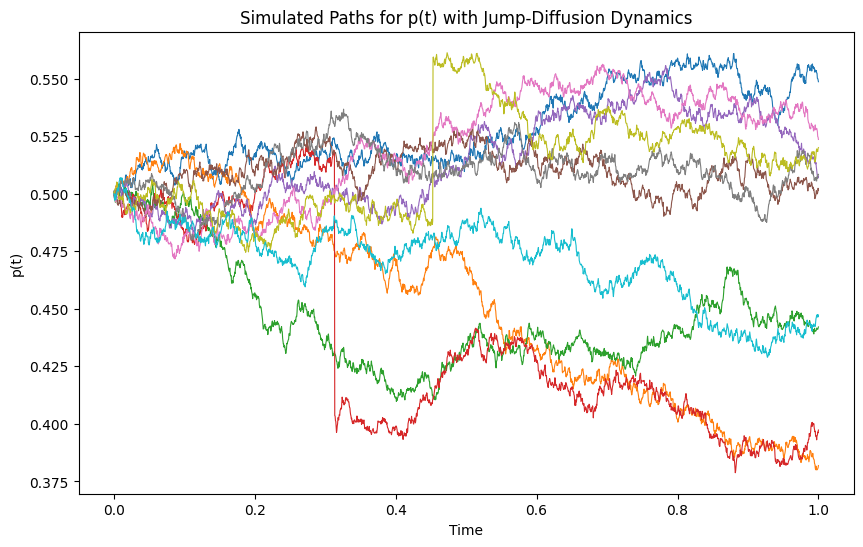

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
T = 1.0             # Total time (e.g., 1 day, 1 year, etc.)
N = 2000            # Number of time steps
dt = T / N          # Time step size
M = 2000            # Number of simulation paths

mu = 0.0            # Drift for X_t
sigma = 0.2         # Volatility for X_t
lambda_jump = 0.2  # Jump intensity (jumps per unit time)
jump_mu = 0.0       # Mean jump size
jump_std = 1.0      # Standard deviation of jump size

X0 = 0.0            # Initial value of X (e.g., logit of p0 = 0.5)

# --- Simulation (Vectorized) ---

# Generate M paths for N time steps:
# 1. Continuous part: Wiener increments dW ~ N(0, sqrt(dt))
dW = np.random.normal(0, np.sqrt(dt), size=(M, N))

# 2. Jump component:
#    For each time step, decide if a jump occurs using a Poisson process.
jump_occurrence = (np.random.rand(M, N) < lambda_jump * dt)
#    If a jump occurs, sample its size from a normal distribution.
jump_sizes = np.random.normal(jump_mu, jump_std, size=(M, N))
#    Only apply jump size if a jump occurs.
jumps = jump_occurrence * jump_sizes

# 3. Total increments for X_t:
#    X_t evolves as: dX_t = mu*dt + sigma*dW + jump
increments = mu * dt + sigma * dW + jumps

# 4. Construct the full path for X_t by cumulatively summing the increments
#    and adding the initial condition X0.
X = np.concatenate((np.full((M, 1), X0), np.cumsum(increments, axis=1)), axis=1)

# 5. Transform X to p_t using the logistic function:
#    p_t = exp(X_t) / (1 + exp(X_t))
p = np.exp(X) / (1 + np.exp(X))

# --- Plotting ---
# Plot a sample of the simulated p_t paths
time_grid = np.linspace(0, T, N + 1)
plt.figure(figsize=(10, 6))
for i in range(min(M, 10)):  # Plot first 10 paths for clarity
    plt.plot(time_grid, p[i, :], lw=0.8)
plt.xlabel("Time")
plt.ylabel("p(t)")
plt.title("Simulated Paths for p(t) with Jump-Diffusion Dynamics")
plt.show()


In [13]:
ending_probabilities = p[:, -1]

# Compute the mean ending probability across all simulation paths
mean_ending_probability = np.mean(ending_probabilities)

# Compute the variance of the ending probabilities
variance_ending_probability = np.var(ending_probabilities)

print("Mean Ending Probability:", mean_ending_probability)
print("Variance of Ending Probability:", variance_ending_probability)

Mean Ending Probability: 0.5018024583466677
Variance of Ending Probability: 0.010675404479602028


Now that we have the code that can create a simulation, let's introduce some option logic using a monte carlo simulation...

Monte Carlo Option Price (Jump-Diffusion): $5.5327


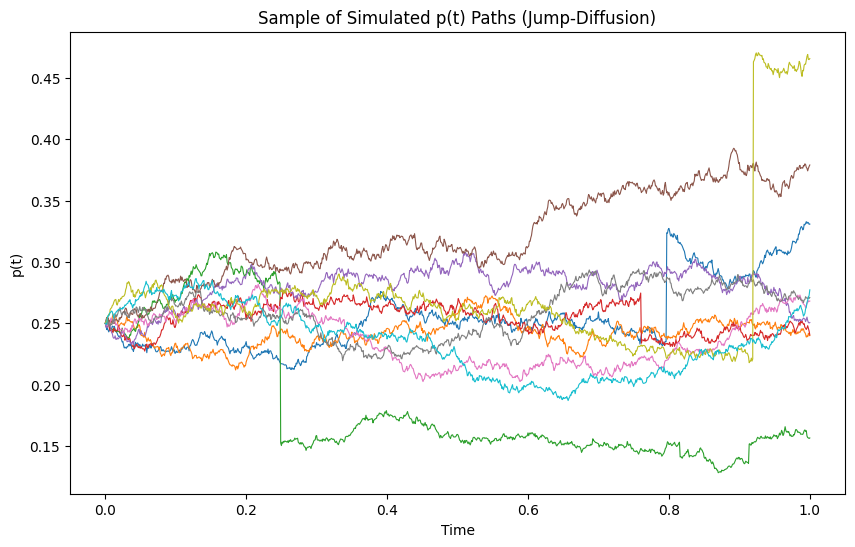

In [23]:
# -----------------------------
# 1. Model & Simulation Parameters
# -----------------------------
T = 1.0          # total time (e.g., 1 year or until gameday)
N = 1000         # number of discrete steps for the Euler-Maruyama approximation
dt = T / N       # length of each time step
M = 50000        # number of simulated paths (Monte Carlo)

r = 0.05         # risk-free rate (annualized)
mu = 0.0         # drift of X_t under *risk-neutral* measure (adjust if needed)
sigma = 0.3      # volatility of X_t
lambda_jump = 0.2  # intensity (frequency) of jumps
jump_mu = 0.0    # mean jump size (in logit space)
jump_std = 1.0   # std dev of jump size (in logit space)

       # initial X value; e.g., logit of p0 = 0.5 => p0 = 0.5
# If you want a different initial probability p0, say 0.25, then:
p0 = 0.25
X0 = np.log(p0 / (1 - p0))

# -----------------------------
# 2. Option / Contract Parameters
# -----------------------------
contract_size = 300   # dollar size of the contract
K = 0.3               # "strike probability" (the threshold p_T must exceed)
# Payoff will be contract_size * max(p_T - K, 0)

# -----------------------------
# 3. Simulate Jump-Diffusion Paths for X_t
# -----------------------------

# (a) Generate the Wiener increments for the continuous part
dW = np.random.normal(0, np.sqrt(dt), size=(M, N))

# (b) Determine jump occurrences using a Poisson process
jump_occurrence = (np.random.rand(M, N) < lambda_jump * dt)
jump_sizes = np.random.normal(jump_mu, jump_std, size=(M, N))
jumps = jump_occurrence * jump_sizes

# (c) Combine drift, diffusion, and jumps into increments for X_t
increments = mu * dt + sigma * dW + jumps

# (d) Cumulative sum to get X_t for each path
#     Start with X0 and add increments over time
X_paths = np.zeros((M, N + 1))
X_paths[:, 0] = X0
X_paths[:, 1:] = X0 + np.cumsum(increments, axis=1)

# -----------------------------
# 4. Convert X_t to p_t via logistic
# -----------------------------
p_paths = np.exp(X_paths) / (1.0 + np.exp(X_paths))

# -----------------------------
# 5. Compute the Payoff at Maturity (Time T)
# -----------------------------
# p_paths[:, -1] gives the final probability p_T for each path
p_final = p_paths[:, -1]

# Payoff = contract_size * max(p_T - K, 0)
payoffs = contract_size * np.maximum(p_final - K, 0.0)

# -----------------------------
# 6. Discount & Average (Risk-Neutral Valuation)
# -----------------------------
# Expected payoff under risk-neutral measure is the mean payoff
mean_payoff = np.mean(payoffs)

# Discount back to present value
option_price_mc = np.exp(-r * T) * mean_payoff

# -----------------------------
# 7. Print / Analyze Results
# -----------------------------
print(f"Monte Carlo Option Price (Jump-Diffusion): ${option_price_mc:.4f}")

# Optional: plot a few simulated paths to visualize p_t
num_plot_paths = 10
time_grid = np.linspace(0, T, N + 1)
plt.figure(figsize=(10, 6))
for i in range(num_plot_paths):
    plt.plot(time_grid, p_paths[i, :], lw=0.8)
plt.title("Sample of Simulated p(t) Paths (Jump-Diffusion)")
plt.xlabel("Time")
plt.ylabel("p(t)")
plt.show()


Let's add an 8 percent our calculated option price, and simulate our PnL if we sold a bunch of them...

Premium Price (8% above fair): $ 5.975308861517927
Mean PnL per option: $ 4.4760471172110865
Total PnL: $ 447.6047117211087
Standard Deviation of PnL per option: $ 5.9940330721979755


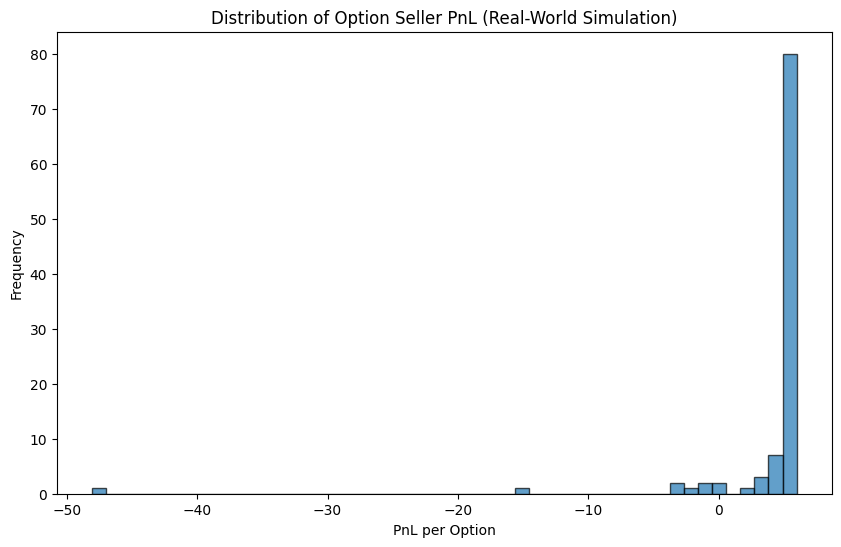

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define Simulation Parameters (Real-World)
# -----------------------------
T = 1.0               # Total time horizon (e.g., 1 year or time until gameday)
N = 1000              # Number of time steps
dt = T / N          # Time step size
M = 100             # Number of simulation paths

r = 0.05              # Risk-free rate (for discounting)

# Real-world parameters for the jump-diffusion process for X_t
mu_real = 0.0         # Drift (real-world)
sigma_real = 0.3      # Volatility
lambda_jump_real = 0.2  # Jump intensity (frequency)
jump_mu_real = 0.0    # Mean jump size (in logit space)
jump_std_real = 1.0   # Std. dev. of jump size (in logit space)

# -----------------------------
# 2. Define Initial Conditions and Contract Parameters
# -----------------------------
p0 = 0.25  # Initial win probability (25%)
# Compute the logit transform: X0 = log(p0/(1-p0))
X0 = np.log(p0 / (1 - p0))

contract_size = 100   # Contract size in dollars
K = 0.3               # Strike probability (e.g., 30%)

# Assume we previously computed a fair (risk-neutral) option price,
# and now we add an 8% premium. For demonstration, suppose the fair price was $10.
fair_price = option_price_mc
premium_price = 1.08 * fair_price  # Selling price with 8% premium

# -----------------------------
# 3. Simulate New "Real-World" Jump-Diffusion Paths for X_t
# -----------------------------
# Generate Wiener increments for the continuous part
dW_real = np.random.normal(0, np.sqrt(dt), size=(M, N))

# Determine jump occurrences using a Poisson process
jump_occurrence_real = (np.random.rand(M, N) < lambda_jump_real * dt)
# Sample jump sizes from a normal distribution
jump_sizes_real = np.random.normal(jump_mu_real, jump_std_real, size=(M, N))
# Only include jump sizes where a jump occurs
jumps_real = jump_occurrence_real * jump_sizes_real

# Total increment for X_t per time step
increments_real = mu_real * dt + sigma_real * dW_real + jumps_real

# Construct the full path for X_t: cumulative sum along time axis
X_paths_real = np.zeros((M, N + 1))
X_paths_real[:, 0] = X0
X_paths_real[:, 1:] = X0 + np.cumsum(increments_real, axis=1)

# -----------------------------
# 4. Convert X_t to p_t via the Logistic Transformation
# -----------------------------
p_paths_real = np.exp(X_paths_real) / (1.0 + np.exp(X_paths_real))
# Extract the terminal probability p_T from each path
p_final_real = p_paths_real[:, -1]

# -----------------------------
# 5. Compute the Option Payoff at Maturity for Each Path
# -----------------------------
# Payoff: if p_T exceeds K, the option is exercised
# Option payoff (per contract): contract_size * max(p_T - K, 0)
payoffs_real = contract_size * np.maximum(p_final_real - K, 0)

# Discount the payoffs back to present value
discounted_payoffs_real = np.exp(-r * T) * payoffs_real

# -----------------------------
# 6. Calculate the Seller's PnL per Option
# -----------------------------
# As an option seller, you collect the premium upfront.
# Your PnL per option is: PnL = premium received - discounted payoff (if any)
PnL_real = premium_price - discounted_payoffs_real

# -----------------------------
# 7. Analyze the PnL Distribution
# -----------------------------
mean_PnL = np.mean(PnL_real)
total_PnL = np.sum(PnL_real)
std_PnL = np.std(PnL_real)

print("Premium Price (8% above fair): $", premium_price)
print("Mean PnL per option: $", mean_PnL)
print("Total PnL: $", total_PnL)
print("Standard Deviation of PnL per option: $", std_PnL)

# Plot a histogram of the PnL distribution
plt.figure(figsize=(10, 6))
plt.hist(PnL_real, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("PnL per Option")
plt.ylabel("Frequency")
plt.title("Distribution of Option Seller PnL (Real-World Simulation)")
plt.show()
